In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Read metadata

In [2]:
df_meta = pd.read_csv("../metadata/dataset_metadata_supp_table3.tsv",sep="\t") # Supp Table 3
df_meta = df_meta[(df_meta["is_selected"]==True)]
df_ttypes= pd.read_csv("../metadata/table_cancer_types_info.tsv",sep="\t") # Supp Table 3
df_ttypes["total"] = df_ttypes["Hartwig"] + df_ttypes["PCAWG"]
ttypes_selected=df_ttypes[df_ttypes["hmf_and_pcawg"]].sort_values("total",ascending=False)["cancer_type"].values

In [3]:
len(ttypes_selected)

20

In [4]:
import json
with open("../metadata/ttypes_selected.json",'w') as f:
    json.dump(list(ttypes_selected),f)

### General barplot

In [5]:
pallete = {"wt":"#ef8a62","alteration":"#67a9cf","alteration_primary":"#7570b3"}

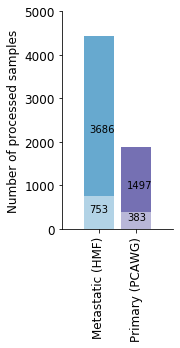

In [6]:
fig,ax=plt.subplots(figsize=(2,4))
# HMF
v=df_meta[df_meta["cohort"]=="Hartwig"]["cancer_type"].value_counts(ascending=True)
other=0
for ttype,count in v.items():
    if ttype in ttypes_selected:
        continue
    else:
        other+=count
ax.bar(x=0,height=other,color=pallete["alteration"],edgecolor=pallete["alteration"],alpha=0.5,lw=0)
ax.annotate(xy=(0-0.25,other/2),s=other)
t=0        
for ttype in ttypes_selected[::-1]:
        count=v[ttype]
        t+=count
ax.bar(x=0,height=t,bottom=other,color=pallete["alteration"],edgecolor=pallete["alteration"],lw=0)
        #ax.annotate(xy=(0,other+count/2),s=ttype)
ax.annotate(xy=(0-0.25,(other+t)/2),s=t)
# PCAWG
other=0
v=df_meta[df_meta["cohort"]=="PCAWG"]["cancer_type"].value_counts(ascending=True)
for ttype,count in v.items():
    if ttype in ttypes_selected:
        continue
    else:
        other+=count
ax.bar(x=1,height=other,color=pallete["alteration_primary"],alpha=0.5,edgecolor=pallete["alteration_primary"],lw=0)
ax.annotate(xy=(1-0.25,other/2),s=other)
t=0
for ttype in ttypes_selected[::-1]:
        count=v[ttype]
        t+=count
ax.bar(x=1,height=t,bottom=other,color=pallete["alteration_primary"],alpha=1.,edgecolor=pallete["alteration_primary"],lw=0)
ax.annotate(xy=(1-0.25,(other+t)/2),s=t)
ax.set_xticks([0,1])
ax.set_xticklabels(["Metastatic (HMF)","Primary (PCAWG)"],rotation=90,fontsize=12)
ax.set_ylabel("Number of processed samples",fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-1,2)
ax.set_ylim(0,5000)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(f'../results/figures/figure2/general_count_cohort.pdf', dpi=800,bbox_inches="tight")

### Per tumor type comparison

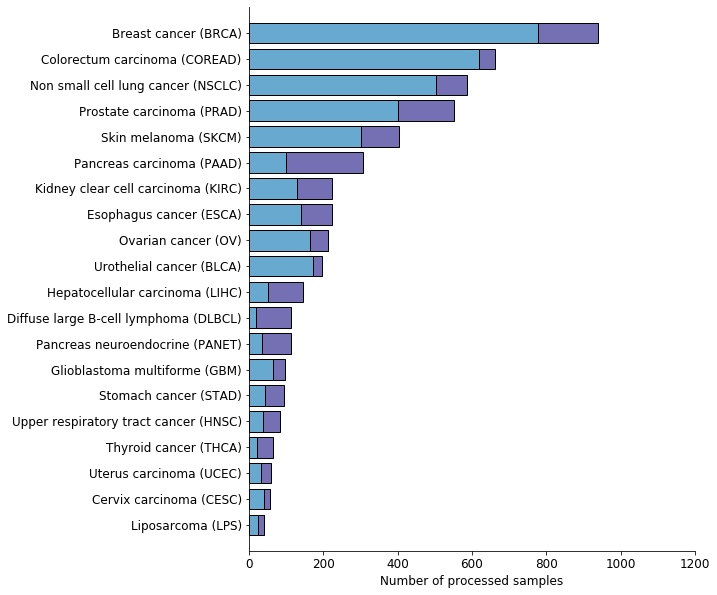

In [7]:
fig,ax = plt.subplots(figsize=(8,10))
y0=0
met=df_meta[df_meta["cohort"]=="Hartwig"]["cancer_type"].value_counts(ascending=True)
primary=df_meta[df_meta["cohort"]=="PCAWG"]["cancer_type"].value_counts(ascending=True)
for ttype in ttypes_selected:
    ax.barh(y=y0,width=met[ttype],color=pallete["alteration"],lw=1.0,edgecolor="black")
    ax.barh(y=y0,width=primary[ttype],left=met[ttype],color=pallete["alteration_primary"],lw=1.0,edgecolor="black")
    y0-=1
_=ax.set_yticks(range(-len(ttypes_selected)+1,1))
labels=[]
for v in ttypes_selected:
    labels.append(v+f" ({df_meta[df_meta['cancer_type']==v]['cancer_type_code'].values[0]})")
ax.set_yticklabels(labels[::-1])
ax.set_ylim(-len(ttypes_selected),1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Number of processed samples",fontsize=12)
ax.set_xlim(0,1200)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(f'../results/figures/figure2/general_count_cohort_ttype.pdf', dpi=800,bbox_inches="tight")

### Representation from cancer types exclusive in Hartwig

10


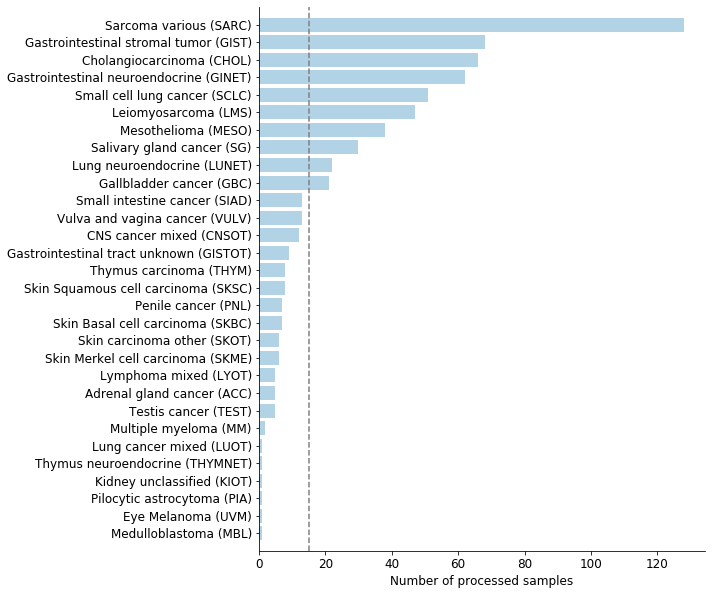

In [8]:
fig,ax = plt.subplots(figsize=(8,10))
y0=0
met=df_meta[(df_meta["cohort"]=="Hartwig")&(~df_meta["cancer_type"].isin(ttypes_selected))&(df_meta["cancer_type"]!="CUP")]["cancer_type"].value_counts(ascending=True)
ttypes_unique=list(met.index)[::-1]

for ttype in ttypes_unique:
    ax.barh(y=y0,width=met[ttype],color=pallete["alteration"],lw=0.0,edgecolor="black",alpha=0.5)
    y0-=1
_=ax.set_yticks(range(-len(ttypes_unique)+1,1))
labels=[]
for v in ttypes_unique:
    labels.append(v+f" ({df_meta[df_meta['cancer_type']==v]['cancer_type_code'].values[0]})")
print (len(met[met>=15]))
ax.set_yticklabels(labels[::-1])
ax.set_ylim(-len(ttypes_unique),1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Number of processed samples",fontsize=12)
#ax.set_xlim(0,1200)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.axvline(x=15,ls="--",color="grey")
plt.savefig(f'../results/figures/figure2/met_count_cohort_ttype_unique.pdf', dpi=800,bbox_inches="tight")

### Representation from cancer types exclusive in PCWAG

7


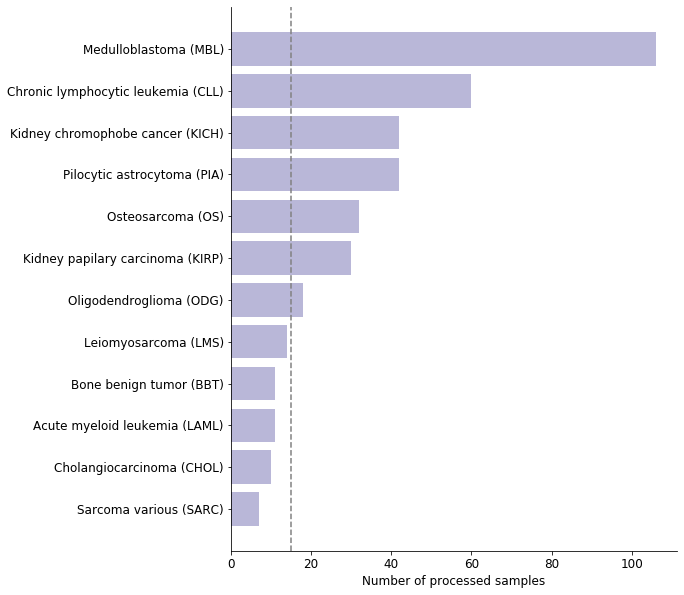

In [9]:
fig,ax = plt.subplots(figsize=(8,10))
y0=0
primary=df_meta[(df_meta["cohort"]=="PCAWG")&(~df_meta["cancer_type"].isin(ttypes_selected))]["cancer_type"].value_counts(ascending=True)
ttypes_unique=list(primary.index)[::-1]

print (len(primary[primary>=15]))
for ttype in ttypes_unique:
    ax.barh(y=y0,width=primary[ttype],color=pallete["alteration_primary"],lw=0.0,edgecolor="black",alpha=0.5)
    y0-=1
_=ax.set_yticks(range(-len(ttypes_unique)+1,1))
labels=[]
for v in ttypes_unique:
    labels.append(v+f" ({df_meta[df_meta['cancer_type']==v]['cancer_type_code'].values[0]})")
ax.set_yticklabels(labels[::-1])
ax.set_ylim(-len(ttypes_unique),1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Number of processed samples",fontsize=12)
#ax.set_xlim(0,1200)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.axvline(x=15,ls="--",color="grey")
plt.savefig(f'../results/figures/figure2/primary_count_cohort_ttype_unique.pdf', dpi=800,bbox_inches="tight")